# **Computação Visual**
*Prof. André Kishimoto*


**Observação**: Os exercícios da semana estão no final deste *notebook*!

# **Filtros com `SciPy` e `scikit-image`**

Nesta semana, usaremos as bibliotecas `SciPy` e `scikit-image` para aplicar filtros em imagens.

Execute as duas células seguintes para verificar se você possui as bibliotecas instaladas. Caso não as possua, consulte a documentação de cada uma para ver como proceder com a instalação.

- [SciPy](https://www.scipy.org/)

- [scikit-image](https://scikit-image.org/)

In [ ]:
import scipy
scipy.__version__

'1.10.1'

In [ ]:
import skimage
skimage.__version__

'0.19.3'

## **Conversão de RGB para tons de cinza**

Usando o `scikit-image`, podemos converter uma imagem colorida para uma imagem em tons de cinza usando a função `rgb2gray()`.

Aproveitaremos também a função `io.imread()` do `scikit-image` para fazer a leitura de um arquivo de imagem.

In [ ]:
from skimage import io
from skimage.color import rgb2gray

In [ ]:
img_filename = './kodim23.png'
img_original = io.imread(img_filename)
img_gray = rgb2gray(img_original)

A seguir, exibiremos a imagem original e sua versão em escala de cinza usando o `Matplotlib`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

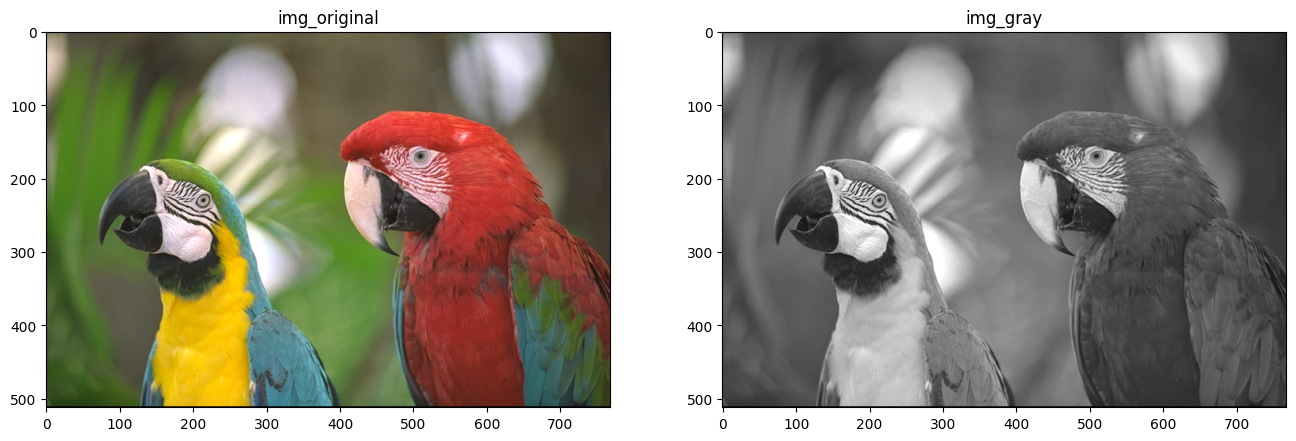

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_original')
axs[0].imshow(img_original, cmap=plt.cm.gray)
axs[1].set_title('img_gray')
axs[1].imshow(img_gray, cmap=plt.cm.gray)
plt.show()

## **Filtro passa baixa com `SciPy`**

O pacote `scipy.ndimage` oferece uma função chamada `generic_filter()` que pode ser usada para aplicar filtros genéricos (criados por nós) em uma imagem.

Em linhas gerais, precisamos definir:

- Um *kernel* no formato `(linha, coluna)`;

- Um array 1D de tamanho `linha * coluna` contendo os pesos de cada posição do *kernel*;

- Uma função *callback* que recebe os dois valores (*kernel* e pesos) e retorna um escalar, que será usado na aplicação do filtro na imagem.

Para mais informações sobre a função `generic_filter()`, [consulte este link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.generic_filter.html).

Nas células seguintes, temos um exemplo de código Python para definir os itens listados acima.

In [ ]:
size = 5
kernel = np.ones((size, size), np.uint8)
pesos = np.full((1, size * size), 1 / (size * size))

In [ ]:
def callback_function(buffer, weights):
    return (buffer * weights).sum()

Observe que definimos a variável `size = 5`, usada para definir o tamanho do *kernel* e do array de pesos. O peso de cada pixel é `1 / (size * size)` - nesse caso, `1/25`. Isso equivale a um filtro de suavização de tamanho 5x5 com o seguinte formato:

              | 1 1 1 1 1 |
              | 1 1 1 1 1 |
    K = 1/25  | 1 1 1 1 1 |
              | 1 1 1 1 1 |
              | 1 1 1 1 1 |

In [ ]:
print(f'kernel: {kernel}')
print(f'pesos: {pesos}')

kernel: [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
pesos: [[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]


Com o *kernel*, pesos e função definidos, vamos chamar a função `generic_filter()` do `SciPy`.

In [ ]:
from scipy.ndimage import generic_filter
img_filtered = generic_filter(input=img_gray, function=callback_function, footprint=kernel, extra_arguments=(pesos,))

Observe que passamos a imagem a ser filtrada (em tons de cinza) no parâmetro `input`, nossa função *callback* no parâmetro `function`, o *kernel* no parâmetro `footprint` e os pesos como `extra_arguments`.

A imagem filtrada é salva na variável `img_filtered`.

A seguir, exibimos a imagem original em tons de cinza e a imagem filtrada.

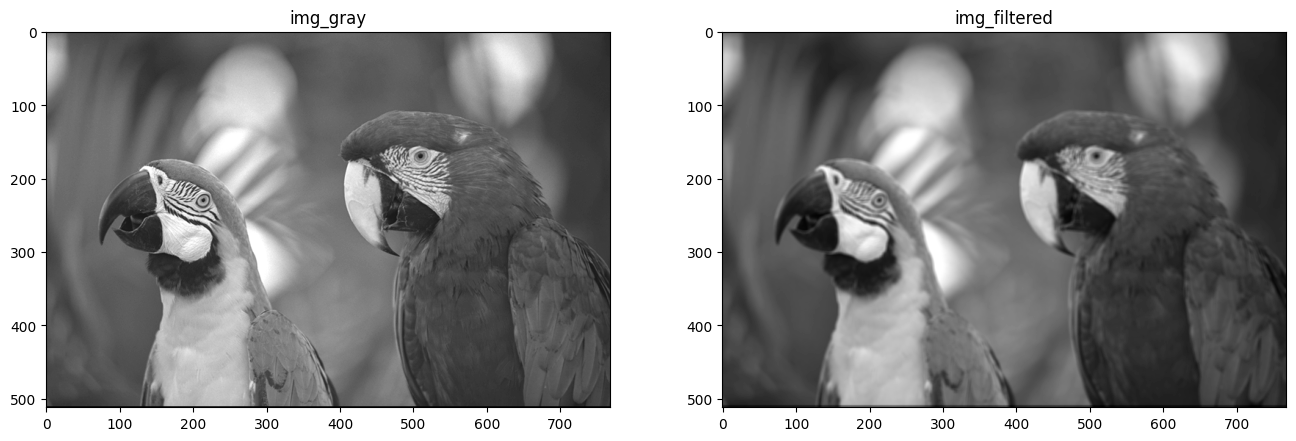

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_gray')
axs[0].imshow(img_gray, cmap=plt.cm.gray)
axs[1].set_title('img_filtered')
axs[1].imshow(img_filtered, cmap=plt.cm.gray)
plt.show()

## **Filtro gaussiano com `scikit-image`**

O `scikit-image` oferece diversos filtros, sendo um deles o filtro gaussiano, via função `gaussian()` do módulo `filters`.

Para aplicar o filtro gaussiano em uma imagem, devemos passar pelo menos dois parâmetros:

- A imagem a ser filtrada, no parâmetro `image`;

- O desvio padrão do kernel gaussiano, no parâmetro `sigma`.

O sigma pode ser um único escalar (aplicado nos dois eixos) ou uma sequência de valores para cada eixo.

Para mais informações sobre a função `gaussian()` e outros filtros do `scikit-image`, [consulte este link](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian).

A seguir, temos um exemplo de código Python que filtra uma imagem em tons de cinza e exibe o resultado do filtro gaussiano (com `sigma=3`) ao lado da imagem original.

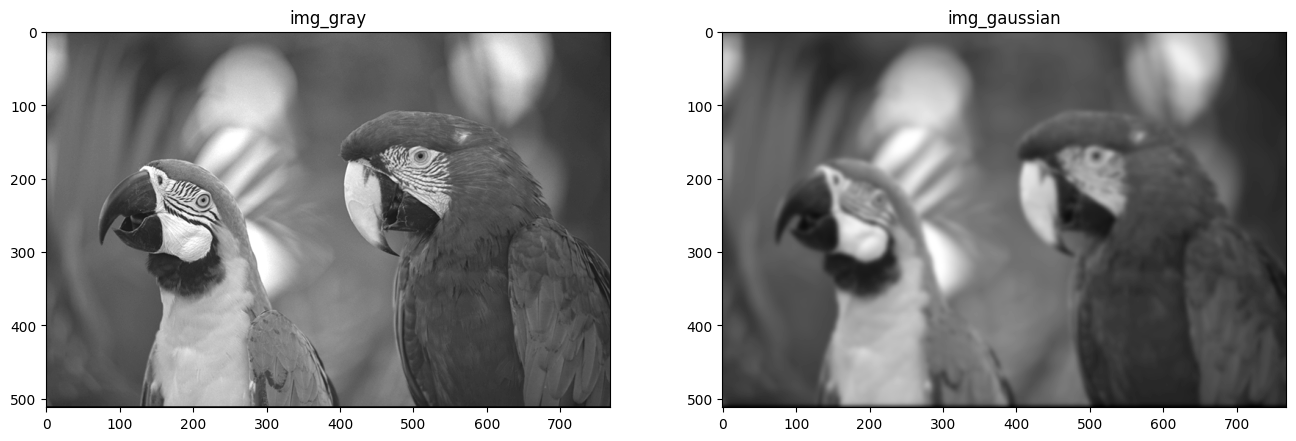

In [ ]:
from skimage.filters import gaussian
img_gaussian = gaussian(image=img_gray, sigma=3)

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_gray')
axs[0].imshow(img_gray, cmap=plt.cm.gray)
axs[1].set_title('img_gaussian')
axs[1].imshow(img_gaussian, cmap=plt.cm.gray)
plt.show()

---
# **Exercícios**

**Observação**: *Ao enviar as alterações com sua solução final no repositório git, certifique-se que o notebook está com todas as saídas executadas, de forma que, ao abrir o arquivo no GitHub (navegador), todas as saídas estarão visíveis.*

## **Exercício 1**

Usando o exemplo apresentado na seção **Filtro passa baixa com `SciPy`** deste *notebook* e seguindo o conteúdo apresentado em aula, reconstrua a imagem "Filtro Passa Alta (High Pass)" do slide 17 da apresentação sobre Filtros Lineares (arquivo "Convolução e filtros lineares 2").

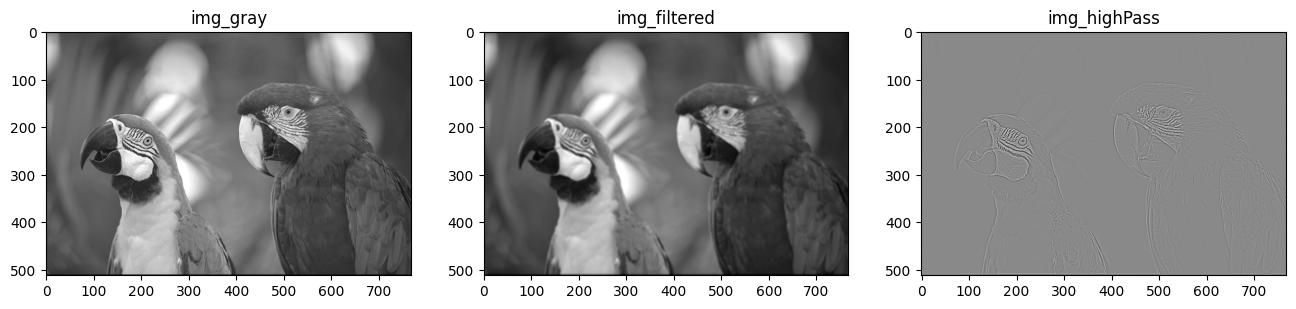

In [42]:
img_highPass = img_gray - img_filtered #passa-tudo - passa-baixa
fig, axs = plt.subplots(1, 3, figsize=(16, 16))
axs[0].set_title('img_gray')
axs[0].imshow(img_gray, cmap=plt.cm.gray)
axs[1].set_title('img_filtered')
axs[1].imshow(img_filtered, cmap=plt.cm.gray)
axs[2].set_title('img_highPass')
axs[2].imshow(img_highPass, cmap=plt.cm.gray)
plt.show()

## **Exercício 2**

O arquivo de imagem `kodim23-salt_and_pepper.png` que está disponível no mesmo local deste *notebook* possui ruído do tipo sal e pimenta (*salt and pepper noise*). Nas primeiras aulas da disciplina, comentamos brevemente que um filtro do tipo mediana pode ser usado para remover esse tipo de ruído.

Usando o `scikit-image`, aplique um filtro de mediana para remover o ruído *salt and pepper* da imagem `kodim23-salt_and_pepper.png`.

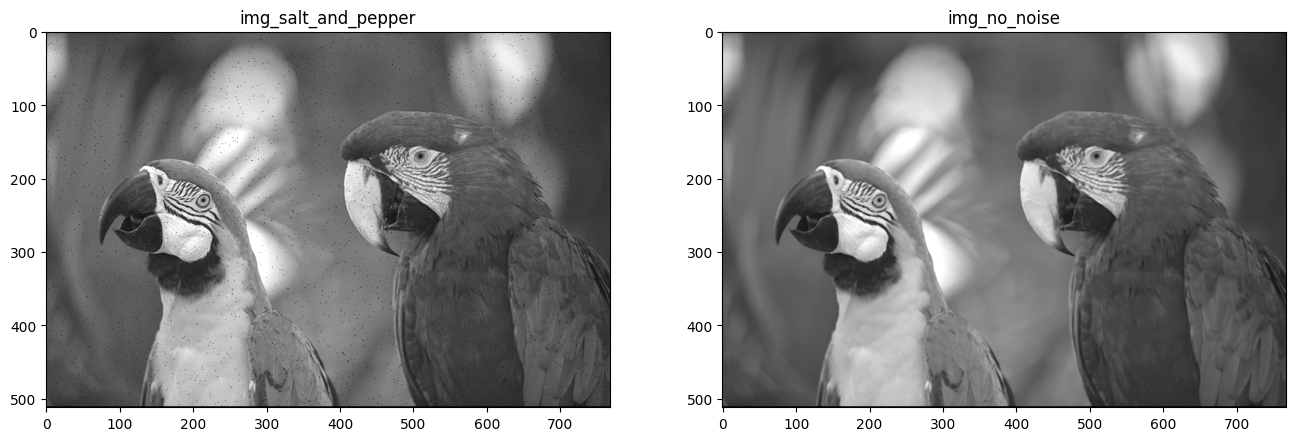

In [ ]:
# TODO: *** Exercício 2 - Implementar e remover esse comentário. ***
from skimage.filters import median

img_filename2 = './kodim23-salt_and_pepper.png'
img_salt_pepper = io.imread(img_filename2)
img_no_noise = median(image=img_salt_pepper)

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('img_salt_and_pepper')
axs[0].imshow(img_salt_pepper, cmap=plt.cm.gray)
axs[1].set_title('img_no_noise')
axs[1].imshow(img_no_noise, cmap=plt.cm.gray)
plt.show()

## **Exercício 3**

Explique como funciona o filtro de mediana e porque é um bom filtro para remover ruído do tipo *salt and pepper*.

In [ ]:
# O filtro de mediana é o mais adequado para remover o ruído sal e pimenta,
# pois ela é menos sensível a valores extremos, suavizando a image sem borrar as bordas